In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes

from GeneticFeatures.GeneticFeatureGenerator import *
from GeneticFeatures.Node import *

from tester import *

In [2]:
def add(x, y):
    return x + y

def sub(x, y):
    return x - y

def mul(x, y):
    return x * y

def div(x, y):
    return x / (y + 1e-10)

In [3]:
generator = GeneticFeatureGenerator(
    [add, sub, mul, div],
    operation_names = ["+", "-", "*", "/"],
    popsize = 80, 
    maxiter = 60, 
    mutation_rate = 0.05
)

In [4]:
dataset = load_diabetes()
X = dataset.data
y = dataset.target

In [5]:
tester = tester(X, y, generator, 8, 2, 1000, verbose = True, test_size = 0.2, random_state = 42)

Split:  0 Feature:  0
Iteration:  59 Best fitness:  0.3742372881355932 Generation best 0.337917675544794243
Split:  1 Feature:  1
Iteration:  59 Best fitness:  0.4136561743341405 Generation best 0.360968523002421355
Split:  0 Feature:  2
Iteration:  59 Best fitness:  0.39012106537530267 Generation best 0.33084745762711865
Split:  1 Feature:  3
Iteration:  59 Best fitness:  0.33181598062954 Generation best 0.27070217917675543437
Split:  0 Feature:  4
Iteration:  59 Best fitness:  0.34973365617433416 Generation best 0.34121065375302664
Split:  1 Feature:  5
Iteration:  59 Best fitness:  0.3790799031476998 Generation best 0.373075060532687745
Split:  0 Feature:  6
Iteration:  59 Best fitness:  0.33423728813559317 Generation best 0.30537530266343826
Split:  1 Feature:  7
Iteration:  59 Best fitness:  0.40978208232445523 Generation best 0.37481840193704596


In [6]:
tester.test_models(notests=50)

In [7]:
tester.get_tests()

,Model,MSE,R2,MAE,NEW_MSE,NEW_R2,NEW_MAE
0,RandomForestRegressor,2945.302579,0.444089,44.153257,2503.250346,0.527524,40.581799
1,MLPRegressor,4512.023317,0.148378,51.600946,4363.609434,0.176390,50.883480
2,GradientBoostingRegressor,3702.534557,0.301165,49.002566,3210.850400,0.393968,44.051970


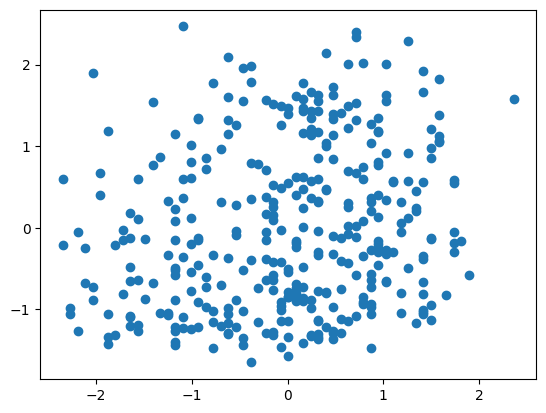

Min:  -2.3486324538364367 Max:  2.3619769564150532 Mean:  1.5096517048727343e-17 Std:  1.0000000000000009


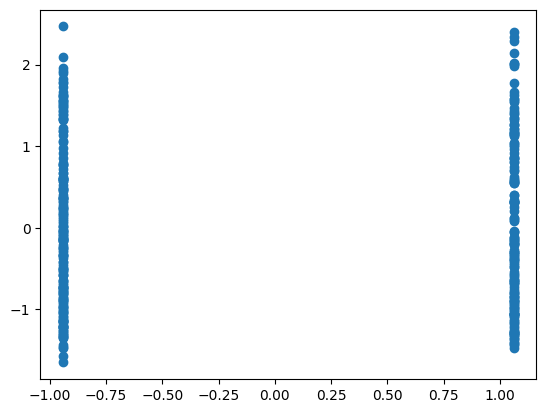

Min:  -0.9421786108585579 Max:  1.0613698809069299 Mean:  6.290215436969726e-17 Std:  1.0000000000000022


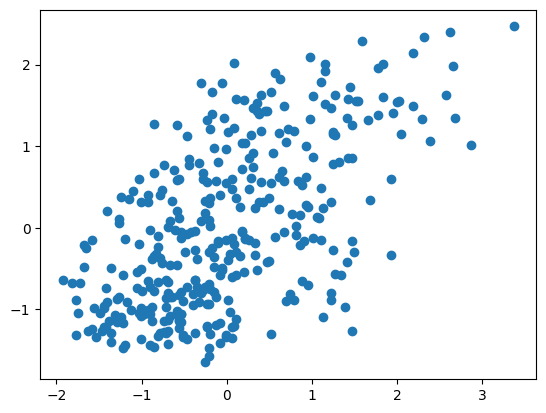

Min:  -1.9262122659964824 Max:  3.3705804187140114 Mean:  -6.290215436969726e-17 Std:  1.0


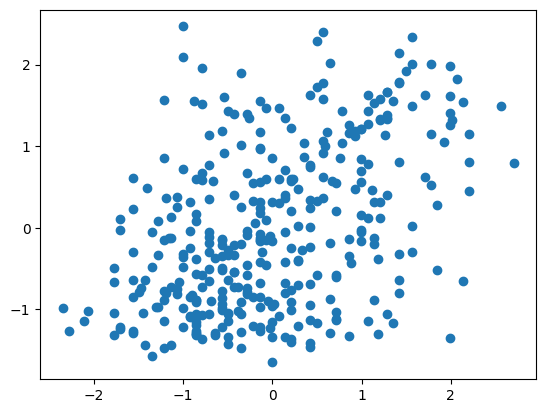

Min:  -2.3466560493895967 Max:  2.7038054721359144 Mean:  1.5096517048727343e-17 Std:  1.0


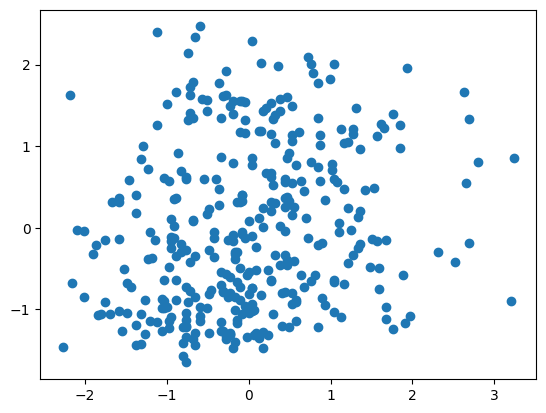

Min:  -2.270371764140696 Max:  3.2371217759635766 Mean:  -3.7741292621818353e-17 Std:  1.0000000000000002


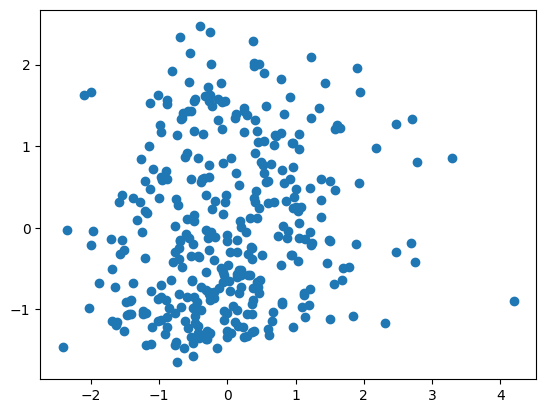

Min:  -2.413754204699228 Max:  4.196352273913501 Mean:  -2.5160861747878903e-18 Std:  1.0000000000000002


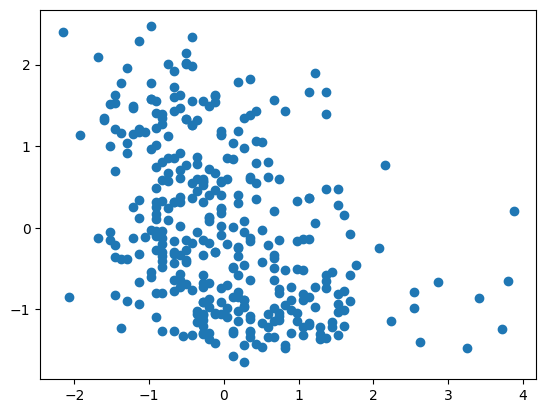

Min:  -2.1567593564585774 Max:  3.877815358441891 Mean:  5.0321723495757804e-17 Std:  1.0000000000000002


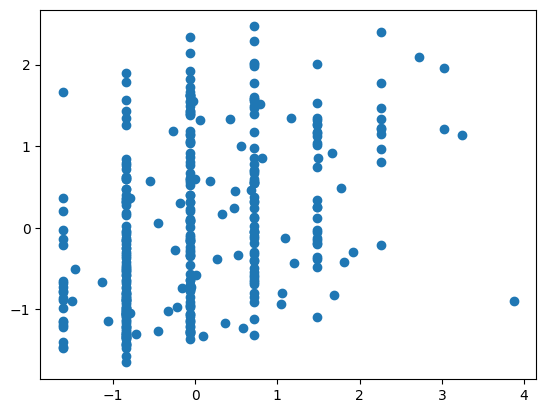

Min:  -1.6087064461483136 Max:  3.873622301436947 Mean:  2.7173730687709215e-16 Std:  1.0000000000000016


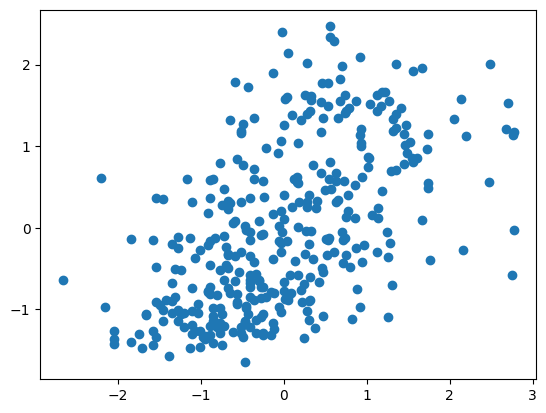

Min:  -2.6656607467111533 Max:  2.7717745232066493 Mean:  4.0257378796606245e-17 Std:  1.0000000000000007


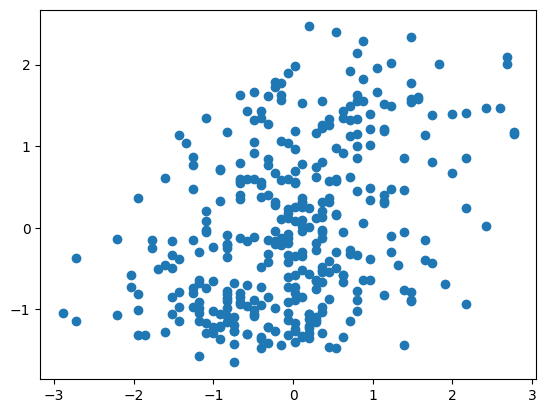

Min:  -2.890772785226981 Max:  2.7678748664465362 Mean:  -4.528955114618202e-17 Std:  0.9999999999999997


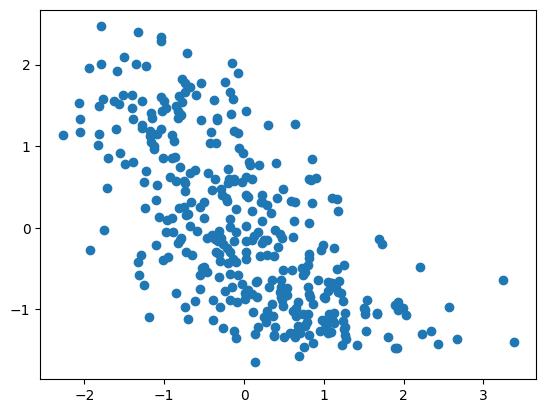

Min:  -2.2722294124941445 Max:  3.3807587938462667 Mean:  1.328493500288006e-15 Std:  0.9999999999999998


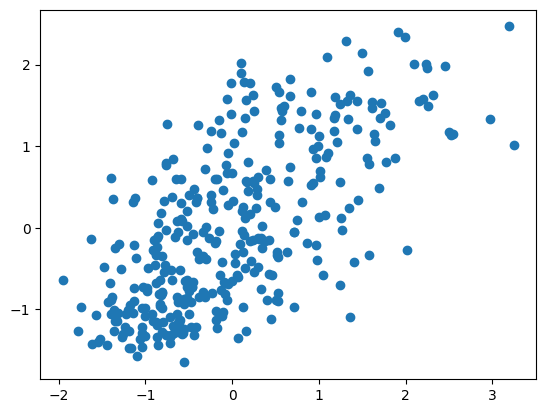

Min:  -1.9518047435034644 Max:  3.246826008164775 Mean:  -2.2292523508620708e-15 Std:  1.0


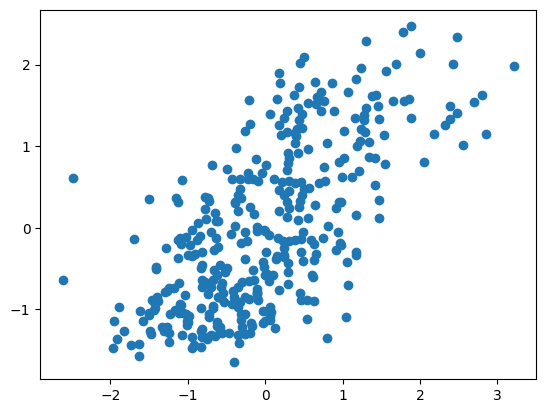

Min:  -2.6161435193831135 Max:  3.2093897784547636 Mean:  -1.5016002291134127e-14 Std:  0.9999999999999998


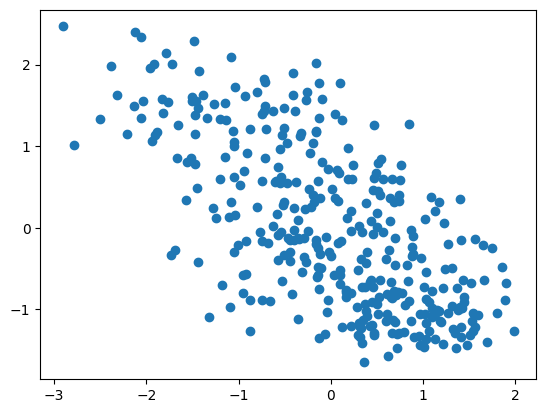

Min:  -2.904548975440461 Max:  1.980884239605886 Mean:  -1.8880710655608328e-14 Std:  0.9999999999999996


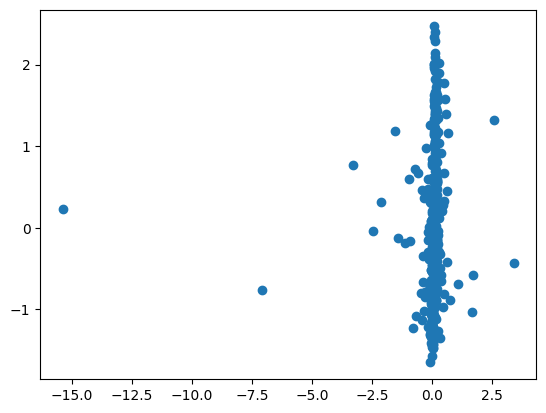

Min:  -15.383581867868351 Max:  3.4112322418690835 Mean:  -2.5160861747878902e-17 Std:  1.0


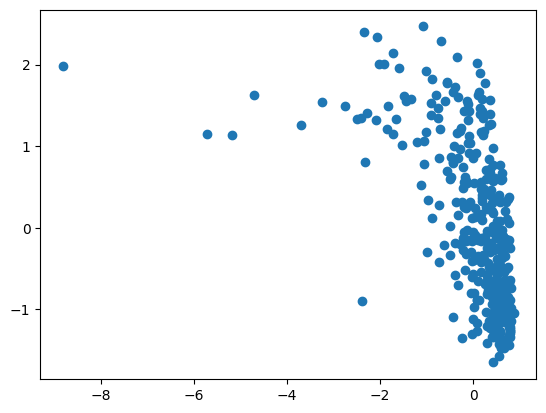

Min:  -8.815411841056282 Max:  0.86852441813874 Mean:  -1.9122254928387965e-16 Std:  1.0


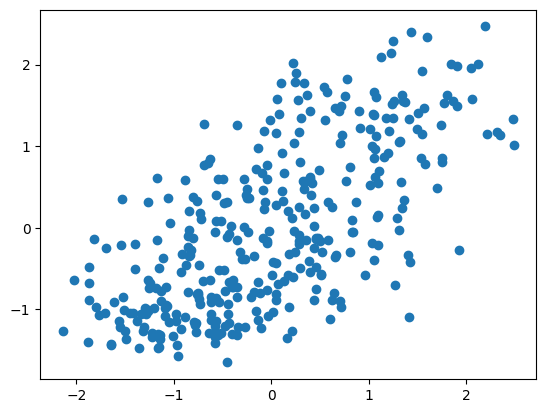

Min:  -2.140027333304039 Max:  2.4902823804958065 Mean:  -7.045041289406092e-17 Std:  1.0000000000000002


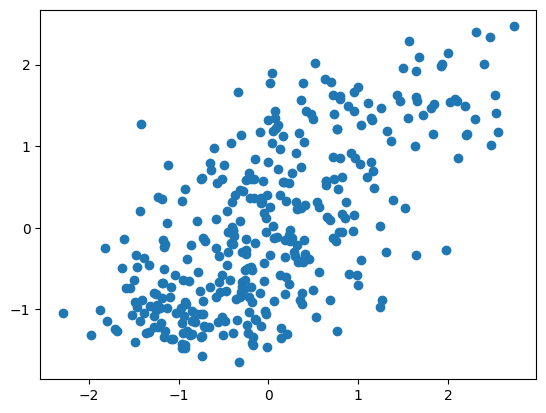

Min:  -2.2903485036190863 Max:  2.729613107771626 Mean:  -2.2141558338133432e-16 Std:  1.0000000000000002


In [14]:
for i in range(tester.new_X_train.shape[1]):
    plt.clf()
    plt.scatter(tester.new_X_train[:, i], tester.y_train)
    plt.show()
    print("Min: ", tester.new_X_train[:, i].min(), "Max: ", tester.new_X_train[:, i].max(), "Mean: ", tester.new_X_train[:, i].mean(), "Std: ", tester.new_X_train[:, i].std())
    